Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/08_Clustering'
except ImportError as e:
    pass

## Exercise 8: Cluster Analysis

### 8.1. Analyzing the Customer Data Set

#### 8.1.1 Load the customers dataset from the Excel file provided in ILIAS.
Load the excel file into a dataframe and inspect the first few records.
Remember to import the pandas package first! Then, call the ```read_excel()``` function to load the file.

In [2]:
# import pandas
import pandas as pd

# load the file using the read_excel() function
customer_data = pd.read_excel('CustomerDataSet.xls')

# show the first few records
customer_data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


#### 8.1.2 Cluster the dataset using K-Means clustering. 

8.1.2.1. Experiment with different K values. Which values do make sense? 

8.1.2.2. What does the clustering tell you concerning your product portfolio? 

8.1.2.3. What does the clustering tell you concerning your marketing efforts in different regions?

#####  8.1.2.1 Cluster the dataset using K-Means clustering. Experiment with different K values. 

The dataset contains five attributes: a customer ID and zip code as well as the number of bought and returned items for different products.
For our analysis, we must first think about the meaning of these attributes and how we should use them.

The customer id identifies individual customers and is otherwise just a number with no meaning, so we will exclude it.
The question asks us to generate insights about our product portfolio and the performance in different regions, so we will use zip code and product for the interpretation of our results.
That leaves us with the two attributes items bought and items returned, which contain the factual data about our business.
It seems hence reasonable to use these two attributes for the clustering (also, using only two attributes allows us to plot everything in this exercise).

Before using the selected attributes, we normalise their values into the same range to make sure that each attribute has the same importance when calculating the distance between the records.

To solve the task, we do the following:
- Cluster on the attributes ```ItemsBought``` and ```ItemsReturned```
- Visualize (Scatter) the clustering using ```ItemsBought``` and ```ItemsReturned``` for the x and y-axes, and the cluster id for the color of the data points.
- repeat the clustering for different K values

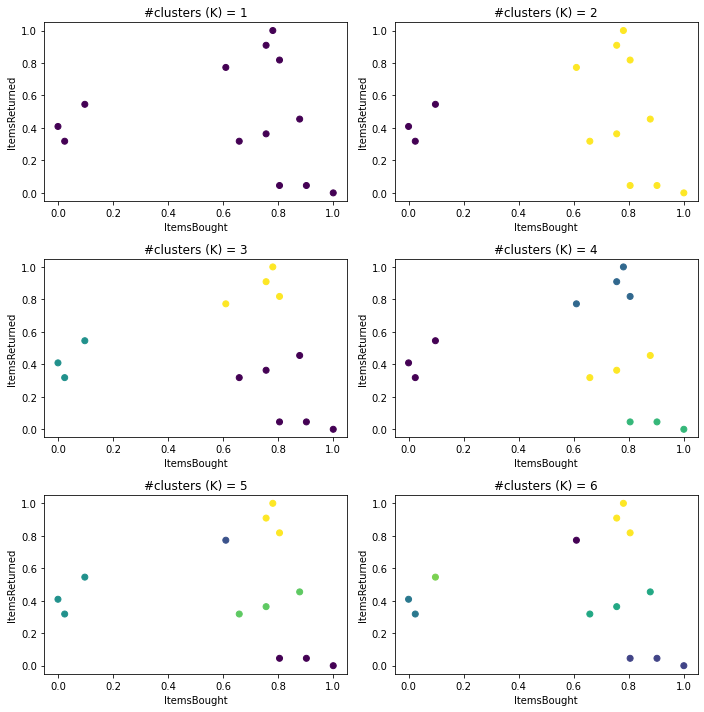

In [3]:
# import KMeans
from sklearn.cluster import KMeans

# import matplotlib
import matplotlib.pyplot as plt

# import preprocessing
from sklearn import preprocessing

# create the normaliser
scaler = preprocessing.MinMaxScaler()

# copy the dataframe before preprocessing so we can access the original values later
preprocessed = customer_data.copy()

# preprocess the features ItemsBought and ItemsReturned
preprocessed[['ItemsBought', 'ItemsReturned']] = scaler.fit_transform(preprocessed[['ItemsBought', 'ItemsReturned']])

# setup a figure
plt.figure(figsize=(10,10))

# iterate over all values that we want to test for K
for i in range(1,7):
    # create the clusterer
    estimator = KMeans(n_clusters = i)
    
    # create the clustering
    cluster_ids = estimator.fit_predict(preprocessed[['ItemsBought', 'ItemsReturned']])

    # add a subplot
    plt.subplot(3,2,i)
    
    # automatically adjust subplot params so that the subplot(s) fits in to the figure area
    plt.tight_layout() 
    
    # setup the labels of the subplot
    plt.title("#clusters (K) = {}".format(i))
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    
    # create the scatter plot
    plt.scatter(preprocessed['ItemsBought'], preprocessed['ItemsReturned'], c=cluster_ids)
        
plt.show()

By looking at the plot it is quite easy for a human to find clusters of data points. The KMeans algorithm found these clusters, too:

```K=3``` makes sense as there are 3 distinct groups:
- Customers that buy a lot and keep the products (Best customers)
- Customers that buy a lot but also return some products (OK customers)
- Customers that don’t buy a lot and also return most products (Likely bad customers)

Alternatively, ```K=4``` is also reasonable, where the cluster of our best customers is split into two parts.

#####  8.1.2.3 What does the clustering tell you concerning your product portfolio?

Run the clustering again with ```K=3```. Add the product ids to the plot using the ```annotate()``` function and interpret the results.

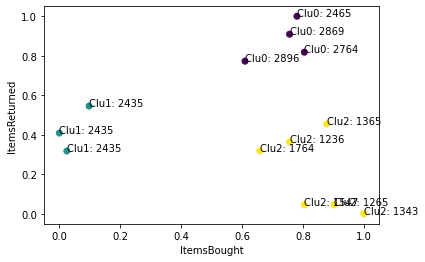

In [4]:
# create the clusterer for K = 3
estimator = KMeans(n_clusters = 3)

# create the clustering
cluster_ids = estimator.fit_predict(preprocessed[['ItemsBought', 'ItemsReturned']])

# create a scatter plot
plt.scatter(preprocessed['ItemsBought'], preprocessed['ItemsReturned'], c=cluster_ids)

# annotate each data point with its product and cluster id
for index, c_id, bought, returned, zip_code, product in preprocessed.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
# setup the labels of the plot
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

# show the plot
plt.show()

We should stop selling product 2435, which is the only product in the bad cluster, as most customers return this product and don't keep it (likely because of bad product quality).
But the values in the plot are hard to understand because we normalised them.
For a better interpretation, let's look at the original values by selecting all records from the bad cluster and showing the data.

In [5]:
# select all records which have the cluster id of the bad cluster
# Note: you might have to change 0 to the according cluster id in your result
customer_data[ cluster_ids == 0 ]

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
1,5,42,18,5,2764
5,10,34,17,6,2896
6,11,40,20,8,2869
12,21,41,22,9,2465


#####  8.1.2.4 What does the clustering tell you concerning your marketing efforts in different regions?

To answer this question, we simply plot again, but this time annotate the clusters with the zip code of the respective customers.
Note that we can use the original dataset instead of the preprocessed one for plotting and still use the clusters created on the preprocessed data, as both datasets have the same ordering of records.

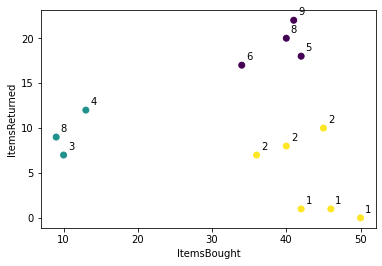

In [6]:
# create the scatter plot
plt.scatter(customer_data['ItemsBought'], customer_data['ItemsReturned'], c=cluster_ids)

# annotate each data point with the zip code value
for (index, c_id, bought, returned, zip_code, product) in customer_data.itertuples():
    plt.annotate(zip_code,(bought + 0.6, returned + 0.6))
    
# setup the plot labels
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

# show the plot
plt.show()

The plot shows that the best cluster contains only customers from regions with zip codes 1 and 2.
So we can assume that we're doing something right in these regions and should check if we can apply the same strategy in the other regions, too.

#### 8.1.3 Cluster the data set using Agglomerative Hierarchical Clustering. What does the dendrogram tell you concerning your customer groups?

To plot a dendrogram, we need to use the ```linkage()``` function from scipy instead of the clusterer from scikit-learn.
After creating the clustering with the ```linkage()``` function, we can plot using the ```dendrogram()``` function

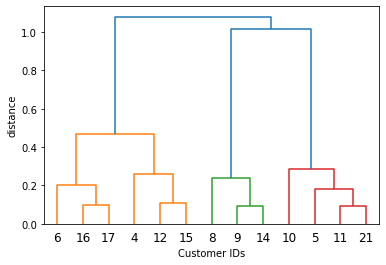

In [7]:
# import linkage and dendrogram from scipy
from scipy.cluster.hierarchy import dendrogram, linkage

# create the clustering
Z = linkage(preprocessed[['ItemsBought', 'ItemsReturned']], 'complete')

# plot the dendrogram
dendrogram(Z, labels=list(customer_data['Customer ID']))

# setup the labels
plt.xlabel('Customer IDs')
plt.ylabel('distance')

# show the plot
plt.show()

Judging by the dendrogram, the customers in the "bad" group (IDs 8, 9 and 14) are far more different from the other customers than the customers in the "good" and "average" group (look at the Y axis).

#### 8.1.4 Flatten the hierarchical clustering so that you get 3 or 4 customer groups. Name these groups with appropriate labels.

To create a partitional clustering from a hierarchical clustering, we have to cut the hierarchy.
You can do this in the ```dendrogram()``` function using the ```truncate_mode``` parameter.
To create cluster ids as in KMeans, use the [```fcluster()``` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html).

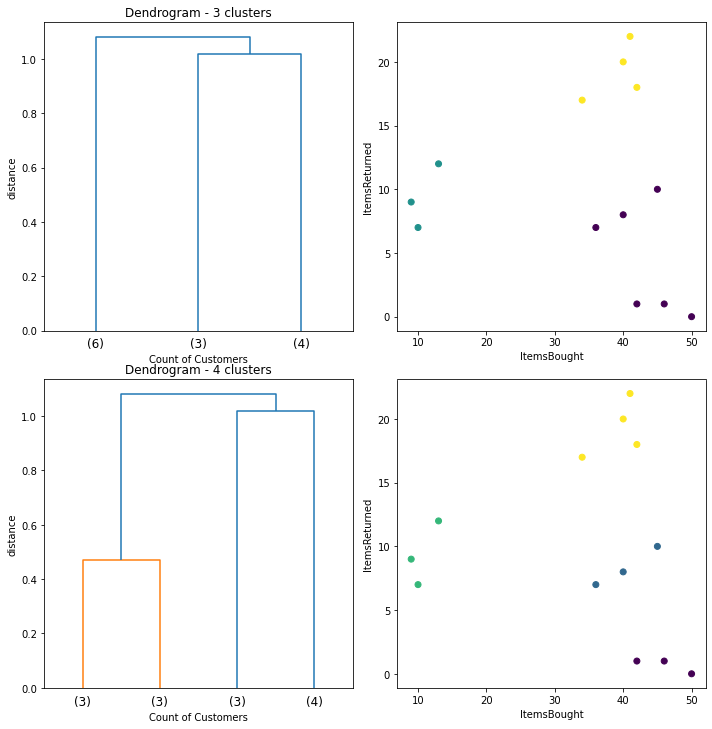

In [8]:
# import fcluster
from scipy.cluster.hierarchy import fcluster

# setup a figure
plt.figure(figsize=(10,10))

# iterate over the different numbers of clusters that we want to consider (here: 3 and 4)
counter = 1
for i in [3,4]:
    # add a sub plot
    plt.subplot(2,2,counter)
    counter += 1
    
    # setup the layout of the plot
    plt.tight_layout()
    plt.title('Dendrogram - {} clusters'.format(i))
    plt.xlabel('Count of Customers')
    plt.ylabel('distance')
    
    # plot the dendrogram
    dendrogram(Z, truncate_mode='lastp', p=i)
    
    # add a second sub plot
    plt.subplot(2,2,counter)
    counter += 1
    
    # create the clusters by cutting the hierarchy
    clusters = fcluster(Z, i, criterion='maxclust')
    
    # create a scatter plot coloured according to the clusteres
    plt.scatter(customer_data['ItemsBought'], customer_data['ItemsReturned'], c=clusters)
    
    # setup the plot labels
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    
# show the figure
plt.show()

Conclusion:
- 3 Groups: Same result as K-Means with K=3.
- 4 Groups: The cluster of the good customers is divided when using 4 clusters
    - Customers buying a lot and keeping (almost) everything (Best Customers)
    - Customers buying a lot and keeping most of the products (Good Customers)
    - Customers buying a lot but returning a significant number of products (Average Customers)
    - Customers returning almost all products (likely bad Customers)

### 8.2. Analyzing the Students Data Set

#### 8.2.1. Aggregate the students data set by student and calculate the average mark and the average number of attended classes

We did that already in the last exercise:

In [9]:
# load the excel file into a dataframe
student_data = pd.read_excel('Student Data for Exercise 1.xls')

# show the first few records
display(student_data.head())

# group the dataframe by student name and calculate the mean values
students = student_data.groupby('Name').mean()

# show the first few records
display(students.head())

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13


,Mark,Attended
Name,,
Alex Krausche,1.325,12.500000
Avid Morvita,3.100,11.333333
Frank Fester,2.200,11.600000
Mariano Selina,1.680,6.200000
Michaela Martke,3.660,7.400000


#### 8.2.2 Cluster the data set using the K-Means algorithm. Does one attribute dominate the clustering? What can you do about this? Assign suitable labels to your clusters.

Run a KMeans clusterer on the data and plot it in a scatter plot. Its a good idea to annotate the data points with the names of the students.

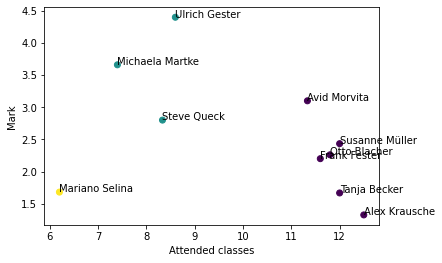

In [10]:
# create the clusterer
estimator = KMeans(n_clusters = 3)

# create the clustering
cluster_ids = estimator.fit_predict(students)

# create the scatter plot
plt.scatter(students['Attended'], students['Mark'], c=cluster_ids)

# setup the labels
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# annotate each data point with the name of the student
for index, mark, attended in students.itertuples():
    plt.annotate(index, (attended, mark))
    
plt.show()

- Clustering is dominated by the number of average attended classes
- Avoid by normalizing this value to the data range of marks [1..5] (or normalize both between 0..1)
- There are 3 different groups of students (K=3):
    - Students attending often and getting good marks (good students)
    - Students attending almost never and getting bad marks (likely bad students)
    - Students attending seldom and getting good marks (high-flyer)

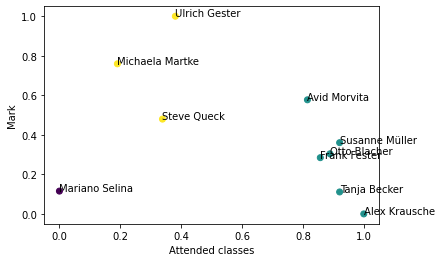

In [11]:
# create the normaliser
min_max_scaler = preprocessing.MinMaxScaler()

# normalise the features
students[['Mark', 'Attended']] = min_max_scaler.fit_transform(students[['Mark', 'Attended']])

# create the clusterer
estimator = KMeans(n_clusters = 3)

# create the clustering
cluster_ids = estimator.fit_predict(students)

# create the scatter plot
plt.scatter(students['Attended'], students['Mark'], c=cluster_ids)

# setup the labels
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# annotate each data point with the name of the student
for index, mark, attended in students.itertuples():
    plt.annotate(index, (attended, mark))
    
plt.show()

#### 8.2.3. Cluster the data set using Agglomerative Hierarchical Clustering. Experiment with different settings for calculating the cluster similarity. What is a good setting?

We first define which settings we want to test (the different linkage modes) and then iterate over these values in a for loop.
Inside the loop, we create the clustering with the respective settings and plot the dendrogram.

In this solution, we use a different approach to adding subplots to a figure:
We use the ```subplot``` function to add a new subplot, and assign the return value to a variable named ```y_axis```.
By passing this variable to all calls to ```subplot``` using the ```sharey``` parameter, we tell all plots to use the same y-axis.

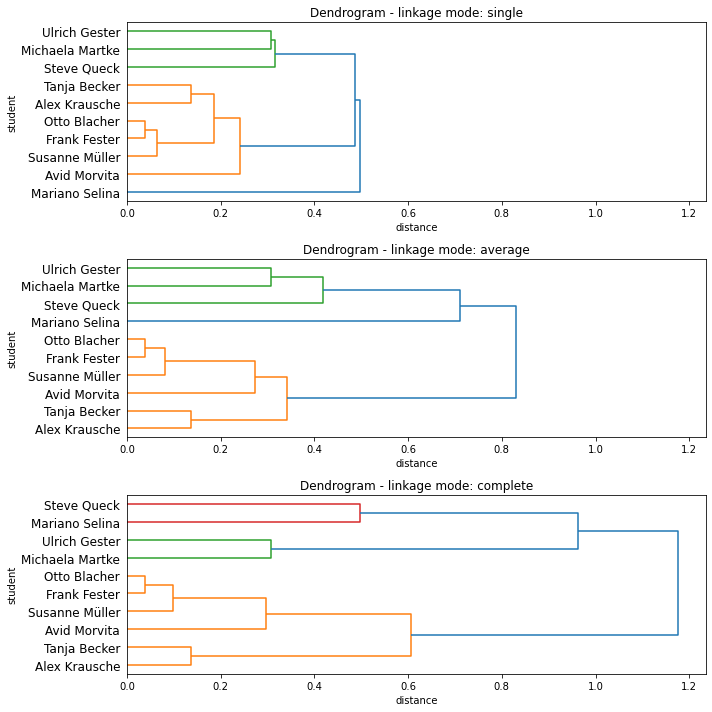

In [12]:
# define the different linkage modes that we want to test
modes = ['single', 'average', 'complete']

# create a figure
plt.figure(figsize=(10,10))

# create a variable for the shared x axis
x_axis = None

# iterate over all linkage modes
for i, mode in enumerate(modes):
    # add a subplot and pass the shared y axis
    x_axis = plt.subplot(3,1,i + 1, sharex = x_axis)
    
    # setup the labels
    plt.title('Dendrogram - linkage mode: {}'.format(mode))
    plt.xlabel('distance')
    plt.ylabel('student')
    
    # create the clustering
    clustering = linkage(students[['Mark', 'Attended']], mode)
    
    # plot the dendrogram
    dendrogram(clustering, labels=list(students.index), orientation='right')
plt.tight_layout()
# show the plots
plt.show()

#### 8.2.4. What does the dendrogram tell you about the distances between the different groups of students?
Solution 3 & 4:
- Single link works best for this set of data. The outstanding “high-flyer” (Student ID 3) cluster is joined on top level with the other clusters.
- Note: When trying to use 4 clusters SingleLink and AverageLink Split up “bad students” into different clusters. CompleteLink splits up the good Students into “very good” and “average students” which could be a better clustering for this set of data.

### 8.3. Clustering the Iris Data Set
#### 8.3. Cluster the Iris data set using different algorithms and parameter settings. Does it make sense to normalise the data before applying the algorithms? Try to choose an algorithm and parameter setting that reproduces the original division into the three different species.
Load the dataset as seen in the last exercise.

In [13]:
# load the file into a dataframe
iris = pd.read_csv('iris.csv')

# show the first few records
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Does it make sense to normalise the data before applying the algorithms?
Have a look at basic statistics of the dataset to check if you should apply normalisation.

In [14]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Conclusion: The value ranges of the features differ quite a bit (minimum of 0.1 vs 4.3 and maximum of 2.5 vs. 7.9), so a normalisation makes sense.

In [15]:
from sklearn import preprocessing

normaliser = preprocessing.StandardScaler()
iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']] = normaliser.fit_transform(iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']])

iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


Then we create clusterings with KMeans, Agglomerative Clustering and DBSCAN using different parameter settings. We compare the results using plots.

As we know the correct assignment from the dataset, we can calculate the overlap between clusters and the types of flowers.
For this calculattion, we add the cluster ids to the dataframe (using the ```join()``` function) and then group by the name of the flower and the cluster id.
Using the ```size()``` function, we get the number of records in each of these groups, which corresponds to the overlap of the cluster with the respective flower type.

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

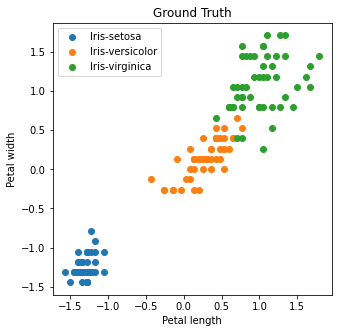

Name             KMeans
Iris-setosa      0         50
Iris-versicolor  1          2
                 2         48
Iris-virginica   1         46
                 2          4
dtype: int64

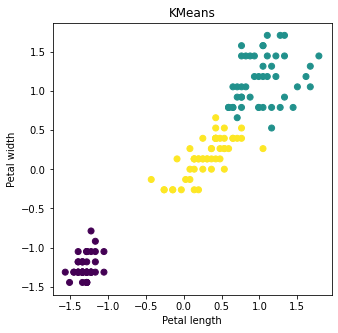

Name             DBSCAN
Iris-setosa      0         50
Iris-versicolor  1         50
Iris-virginica   1         50
dtype: int64

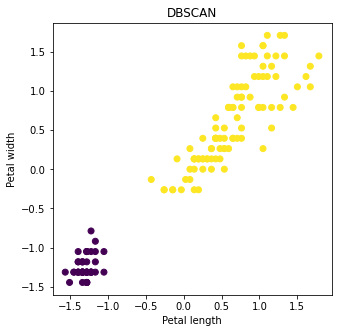

Name             single
Iris-setosa      1         50
Iris-versicolor  0         50
Iris-virginica   0         49
                 2          1
dtype: int64

Name             average
Iris-setosa      1          50
Iris-versicolor  0          49
                 2           1
Iris-virginica   0           2
                 2          48
dtype: int64

Name             complete
Iris-setosa      2           50
Iris-versicolor  0           25
                 1           25
Iris-virginica   0           50
dtype: int64

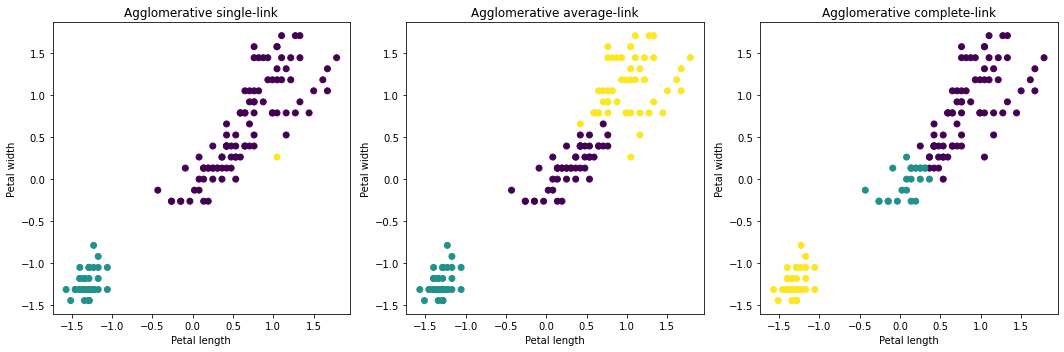

In [16]:
# import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# import DBSCAN
from sklearn.cluster import DBSCAN

# show frequency of each type of flower
display(iris.groupby('Name').size())

# plot the correct assignment
plt.figure(figsize=(5,5))

# create one series per type of flower
for name, group in iris.groupby('Name'):
    plt.scatter(group['PetalLength'], group['PetalWidth'], label=name)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Ground Truth")
plt.legend()
plt.show()

# ***************************
# KMeans
# ***************************
estimator = KMeans(n_clusters = 3)
estimator.fit(iris[['PetalLength', 'PetalWidth']])

# show the frequency of each type of flower in every cluster
display(iris.join(pd.Series(estimator.labels_, name="KMeans")).groupby(['Name', 'KMeans']).size())

# plot the clusters
plt.figure(figsize=(5,5))
plt.title("KMeans")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(iris['PetalLength'], iris['PetalWidth'], c=estimator.labels_)
plt.show()


# ***************************
# DBSCAN
# ***************************
estimator = DBSCAN()
estimator.fit(iris[['PetalLength', 'PetalWidth']])
# show the frequency of each type of flower in every cluster
display(iris.join(pd.Series(estimator.labels_, name="DBSCAN")).groupby(['Name', 'DBSCAN']).size())

# plot the clusters
plt.figure(figsize=(5,5))
plt.scatter(iris['PetalLength'], iris['PetalWidth'], c=estimator.labels_)
plt.title("DBSCAN")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


# ***************************
# Agglomerative
# ***************************
plt.figure(1, (15,5))
for i, mode in enumerate(['single', 'average', 'complete']):
    estimator = AgglomerativeClustering(n_clusters = 3, linkage=mode)
    estimator.fit(iris[['PetalLength', 'PetalWidth']])
    
    # show the frequency of each type of flower in every cluster
    display(iris.join(pd.Series(estimator.labels_, name=mode)).groupby(['Name', mode]).size())
    
    # plot the clusters
    plt.subplot(1,3,i+1)
    plt.tight_layout()
    plt.title("Agglomerative {}-link".format(mode))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.scatter(iris['PetalLength'], iris['PetalWidth'], c=estimator.labels_)
plt.show()

Agglomerative clustering with single link works best here.

### 8.4. Clustering the Geo Data Set

#### 8.4.1. The geo data set (provided in ILIAS) contains the coordinates (x & y) of housings in a certain area. Have a look at the data and visualize it with a scatter plot, using the ```area``` feature as colour.

In [17]:
# read the dataset into a dataframe
geo_data = pd.read_excel('geo.xlsx')

# show the first few lines
geo_data.head()

,id,x,y,area
0,1,1,1,1
1,2,2,1,1
2,3,3,1,1
3,4,4,1,1
4,5,5,1,1


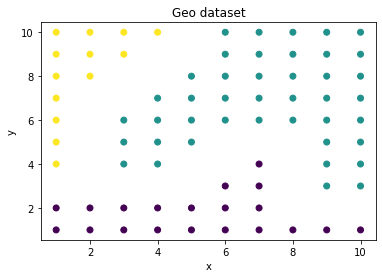

In [18]:
# create a scatter plot
plt.title("Geo dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(geo_data['x'], geo_data['y'], c=geo_data['area'])
plt.show()

#### 8.4.2. Cluster the data using k-Means (k=3). Do the clusters represent the original areas?
We cluster the dataset and plot again, this time using the cluster ids as colour.

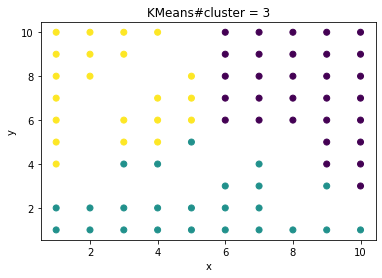

In [19]:
# create the clustering
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(geo_data[['x', 'y']])

# plot again
plt.title("KMeans#cluster = 3")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(geo_data['x'], geo_data['y'], c=cluster_ids)
plt.show()

**Solution:** Although its clearly recognizable that there are 3 different areas described by the geo data set, k-Means is not able to reproduce these areas as they have no representative centroid (are not of globular shaped), which leads to miss-clustered items.

#### 8.4.3. Apply DBSCAN and play around with the epsilon. Can you reproduce the original areas using this cluster algorithm?

We run DBSCAN in its default configuration first.
Then, we systematically test different parameter settings for ```min_samples``` and ```eps```.

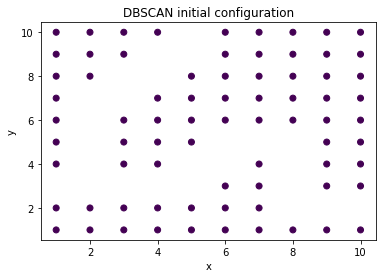

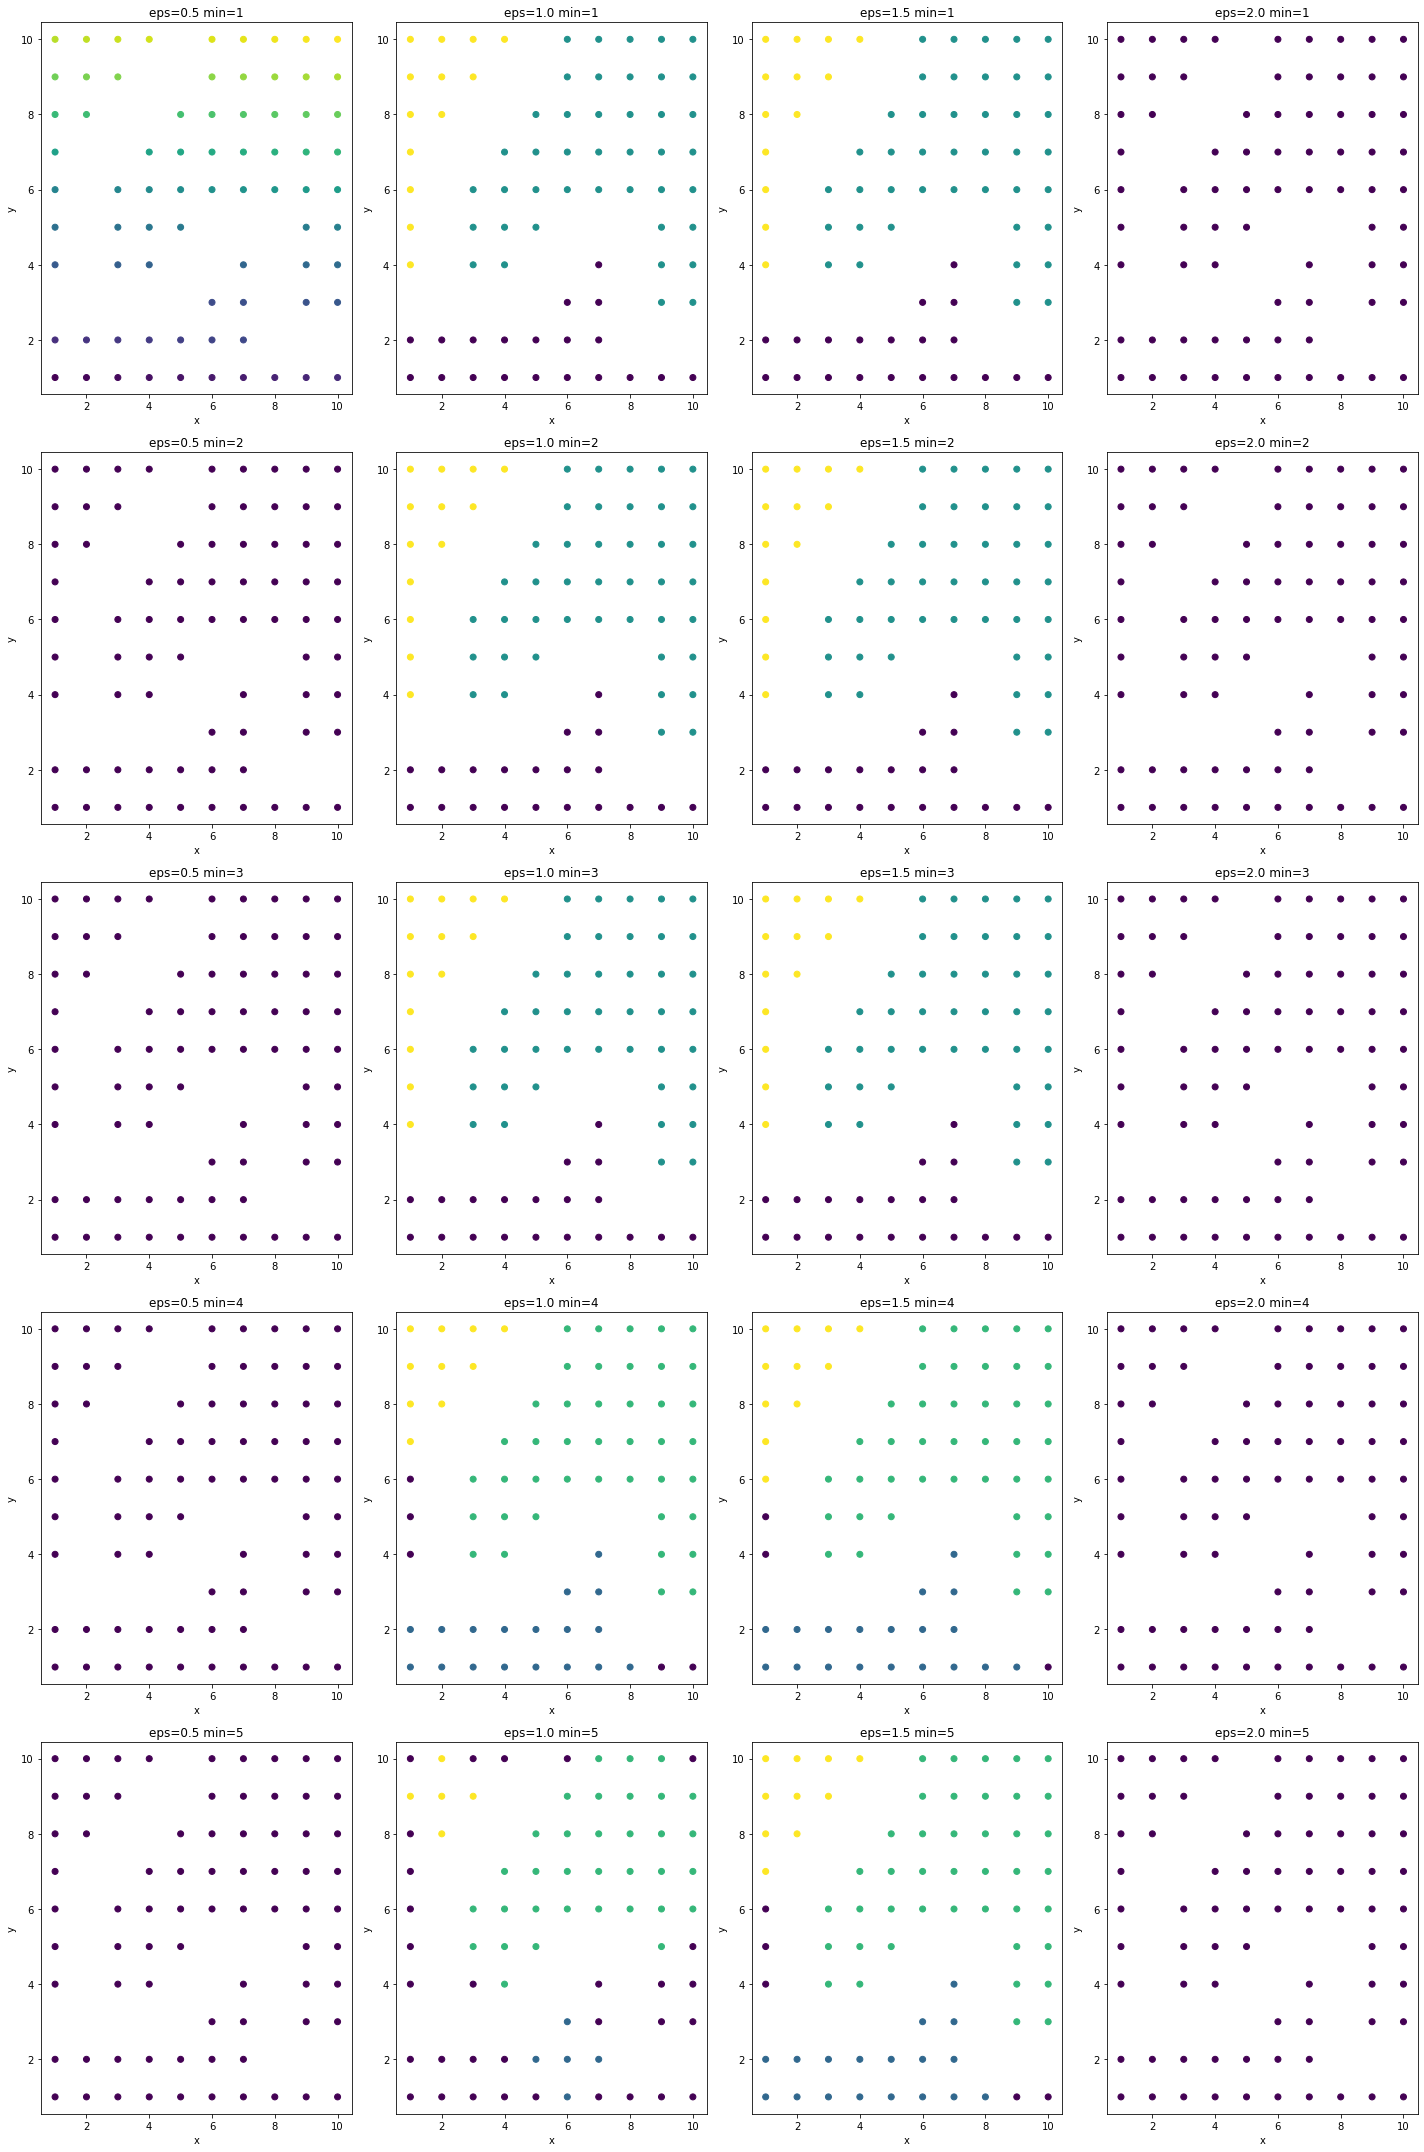

In [20]:
# show the result of running DBSCAN with default configuration
cluster_ids = DBSCAN().fit_predict(geo_data[['x', 'y']])
plt.scatter(geo_data['x'], geo_data['y'], c=cluster_ids)
plt.title("DBSCAN initial configuration")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# test different parameter settings and plot the results
plt.figure(1, (20,30))
counter = 1
for min_samples in [1,2,3,4,5]:
    for eps in [0.5, 1.0, 1.5, 2.0]:
        cluster_ids = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(geo_data[['x', 'y']])
        
        plt.subplot(5,4,counter)
        plt.tight_layout()
        plt.scatter(geo_data['x'], geo_data['y'], c=cluster_ids)
        plt.title("eps={} min={}".format(eps, min_samples))
        plt.xlabel('x')
        plt.ylabel('y')
        
        counter += 1
plt.show()

**Solution:**
Applying DBScan to the data-set does not work using the default set-up (eps=0.5, min_samples=5), as the data set only has integer coordinates (minimum distance 1).
With epsilon between set to 1.0 or 1.5 as weel as minimum points between 1 and 3 lets DBScan reproduce the original areas.

### 8.5. Clustering the Zoo Data Set
#### 8.5.1. The Zoo data set describes 101 animals using 18 different attributes. The data set is provided in ILIAS as an ARFF file. Load this dataset.

In [21]:
# import arff
from scipy.io import arff

# load the file and create a dataframe
zoo_arff_data, zoo_arff_meta = arff.loadarff('zoo.arff')
zoo_data = pd.DataFrame(zoo_arff_data)

# solve the encoding issue in the data
columns_with_binary_strings = zoo_data.select_dtypes('object').columns.values
zoo_data[columns_with_binary_strings] = zoo_data[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))

zoo_data.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
1,antelope,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true,mammal
2,bass,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false,fish
3,bear,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
4,boar,true,false,false,true,false,false,true,true,true,true,false,false,4.0,true,false,true,mammal


#### 8.5.2. Cluster the data set using Agglomerative Hierarchical Clustering. Experiment with different parameter settings in order to generate a nice species tree.

We first have to encode the non-numerical features. Note that the ```type``` feature already contains a classification of the species, so we exclude it and use it to see if our results make sense.

In [22]:
#encode parameters:
from sklearn import preprocessing
selected_attributes = ['hair','feathers', 'milk', 'airborne', 'toothed', 
                       'backbone', 'breathes', 'venomous', 'fins', 'tail', 
                       'domestic', 'catsize']

ordinal_encoder = preprocessing.OrdinalEncoder()
zoo_data[selected_attributes] = ordinal_encoder.fit_transform(zoo_data[selected_attributes])
zoo_data.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1.0,0.0,false,1.0,0.0,false,true,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,mammal
1,antelope,1.0,0.0,false,1.0,0.0,false,false,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,mammal
2,bass,0.0,0.0,true,0.0,0.0,true,true,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,fish
3,bear,1.0,0.0,false,1.0,0.0,false,true,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,mammal
4,boar,1.0,0.0,false,1.0,0.0,false,true,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,mammal


Then we can create a clustering and look at the dendrogram.
As some of the animals have very similar features, they have a distance of 0, which means there will be lines in the dendrogram at ```x==0```.
In the default configuration, however, we cannot see these lines. 
To solve this, we need to move the left limit of the figure further to the left using the [```set_xlim()``` function](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).

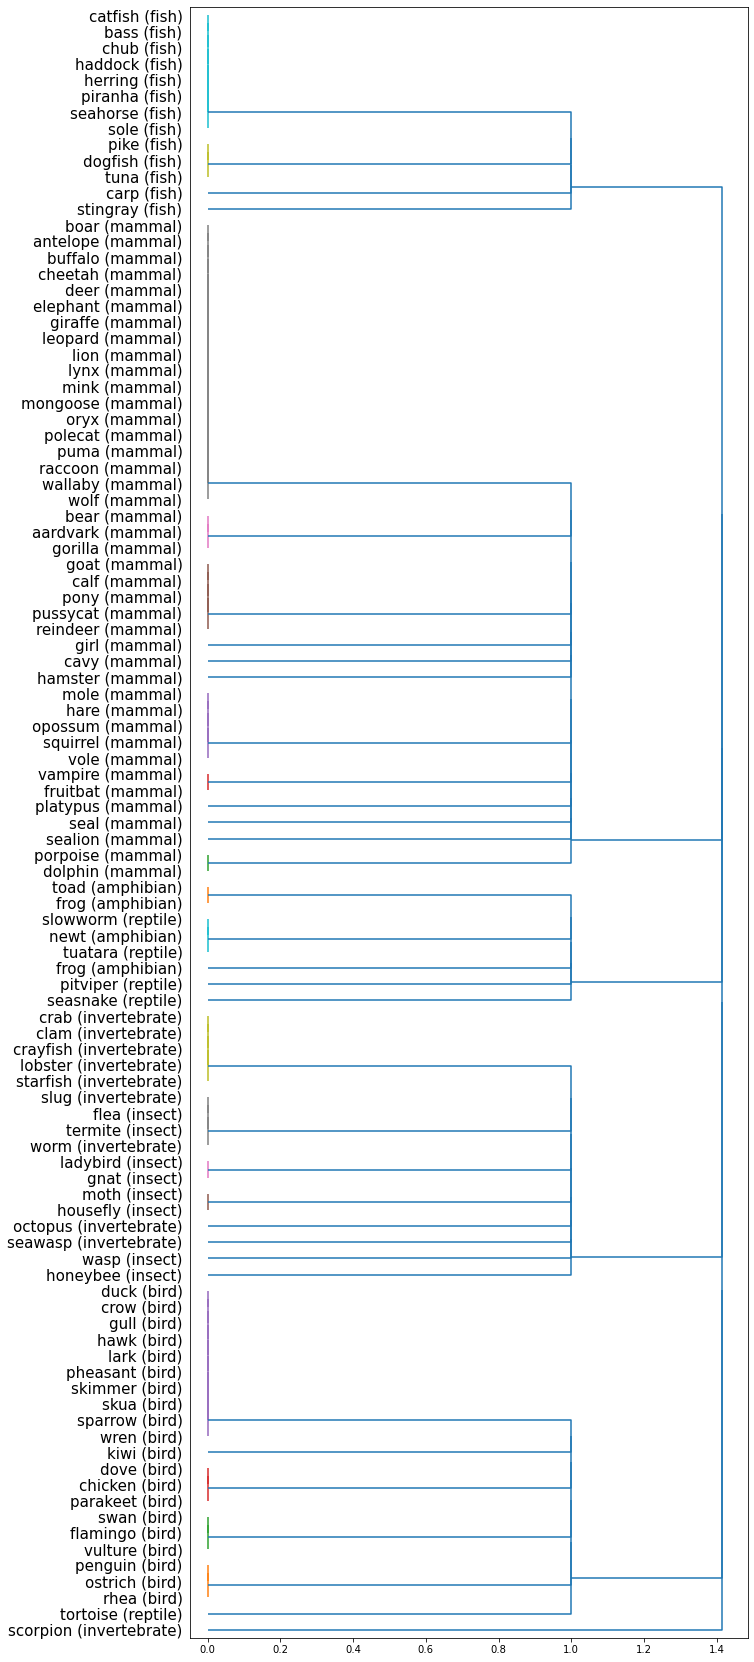

In [23]:
fig = plt.figure(figsize=(10, 30))

ax = dendrogram(
    linkage(zoo_data[selected_attributes], method='single'),
    orientation='right',
    labels=list(zoo_data['animal'].values + " (" + zoo_data['type'].values + ")"),
    leaf_font_size = 15
)

# get the axes of the current figure (not the plot!)
axes = plt.gca()
# set the left limit further to the left, so we can see the lines drawn at x=0
axes.set_xlim((-0.05, axes.get_xlim()[1]))


plt.show()